# DATA PREPROCESSING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

dataset = open('/content/drive/MyDrive/Colab Notebooks/student+performance/student/student-mat.csv')
data = pd.read_csv(dataset, sep =';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


There are no missing values in the dataset.

In [ ]:
# Inspect for missing values
data.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


The dataset exhibited heterogenity in data types within its columns. Several columns were categorized as `object`, indicating the presence of textual or mixed-type data, while others were classified as `int64` , representing integer values.

In [ ]:
# Display data information
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

None

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


`LabelEncoder` was used to transform categorical features into numerical representations suitable for machine learning models. It specifically assigns unique integer to each distinct category within a column:

* **sex** -  F: 0 M: 1
* **address** - R: 0 U: 1
* **famsize** - GT3: 0 LE3: 1
* **pstatus** - A: 0 T: 1
* **mjob/fjob** - at_home: 0 health: 1 other: 2 services: 3 teacher: 4
* **guardian** - father: 0 mother: 1
* **schoolsup-romantic** - no: 0 yes: 1


In [ ]:
# Conveert categorical data into numerical format
from sklearn.preprocessing import LabelEncoder

# Instance
encoder = LabelEncoder()

# Select object data type
categorical_features = ['school','sex','address',
                       'famsize','Pstatus','Mjob',
                       'Fjob','reason','guardian',
                       'schoolsup','famsup','paid',
                       'activities','nursery','higher',
                       'internet','romantic']

# Transform string type into numerical
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature].astype(str))

data[categorical_features]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,1,1,0,3,3,0,2,0,1,1,0,1,1,0,0
391,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1,0
392,1,1,0,0,1,2,2,0,2,0,0,0,0,0,1,0,0
393,1,1,0,1,1,3,2,0,1,0,0,0,0,0,1,1,0


Determining correlations of each features with the final grade sorted in ascending order. A positive correlation indicates that as one feature increases, the other increases. A negative correlation indicates that as one feature decreases, the other increases.


In [ ]:
data.corr()['G3'].sort_values(ascending=True)

,G3
failures,-0.360415
age,-0.161579
goout,-0.132791
romantic,-0.129970
traveltime,-0.117142
schoolsup,-0.082788
guardian,-0.070109
health,-0.061335
Pstatus,-0.058009
Dalc,-0.054660


Assigning the predictors and the target variable

In [ ]:
# Selecting features and target variable
x = data.drop('G3', axis=1)
y = data['G3']

# MODEL IMPLEMENTATION, PERFORMANCE EVALUATION


* `KNNRegression`: used when the target variable value is continuous; predicts the value of a target variable (final grade from 0 to 20) based on the average of the value of its k neighbors
 * whereas `KNNClassifier` predicts the class to which the target variable belong by computing probability
* `GridSearchCV`: explores a range of hyperparameter values specified as a grid, then evaluates each combination using cross-validation to get an estimate of performance

* Evaluation Metrics:
  * **MSE**: average of squared differences between predicted and actual values
  * **RMSE**: square root of MSE
    * lower values means better fit to the data
  * **R-squared**: proportion of variance in the target variable
    * higher values indicate that predictions are closer to data

K-Nearest Neighbors:
Optimal K			: 8
Mean Squared Error (MSE)	: 13.165743670886076
Root Mean Squared Error (RMSE)	: 3.6284629901496963
R-squared (R2)			: 0.5227874792370863

Linear Regression Model:
Mean Squared Error (MSE)	: 5.645265542791853
Root Mean Squared Error (RMSE)	: 2.3759767555243156
R-squared (R2)			: 0.7953787140783359



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


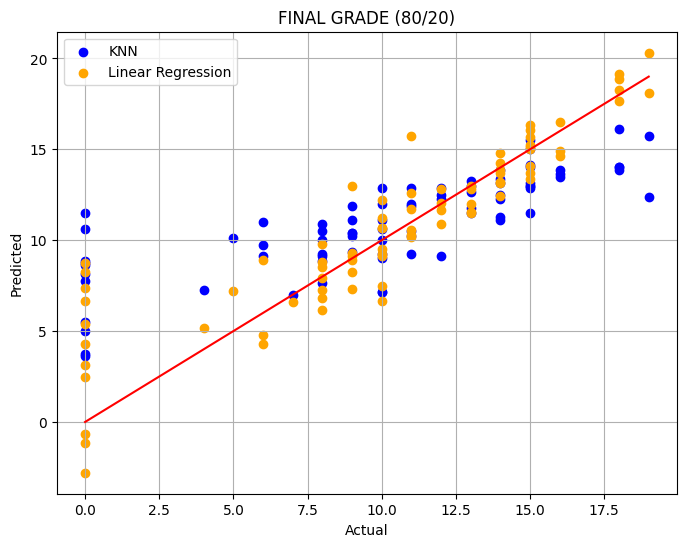

K-Nearest Neighbors:
Optimal K			: 12
Mean Squared Error (MSE)	: 14.529820261437909
Root Mean Squared Error (RMSE)	: 3.811800133983668
R-squared (R2)			: 0.4797500234585883

Linear Regression Model:
Mean Squared Error (MSE)	: 5.688499345402381
Root Mean Squared Error (RMSE)	: 2.385057514065936
R-squared (R2)			: 0.7963194590331051



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


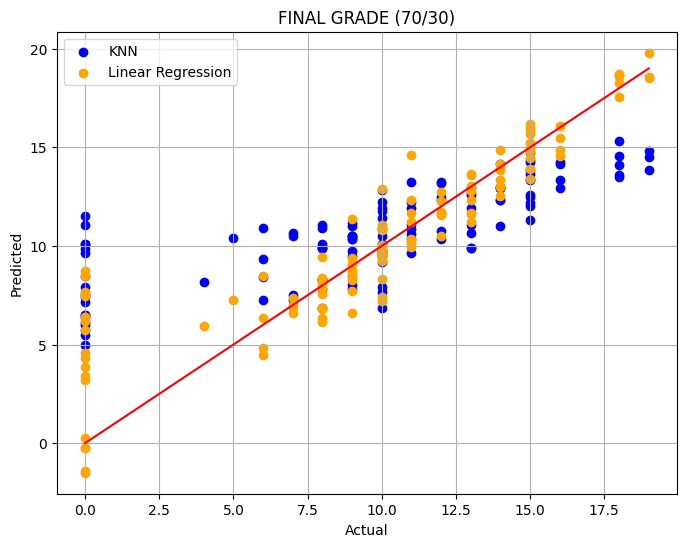

K-Nearest Neighbors:
Optimal K			: 11
Mean Squared Error (MSE)	: 12.575269379642224
Root Mean Squared Error (RMSE)	: 3.546162627354
R-squared (R2)			: 0.4967214977469374

Linear Regression Model:
Mean Squared Error (MSE)	: 4.721863933270921
Root Mean Squared Error (RMSE)	: 2.1729850283126484
R-squared (R2)			: 0.8110249143428723



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


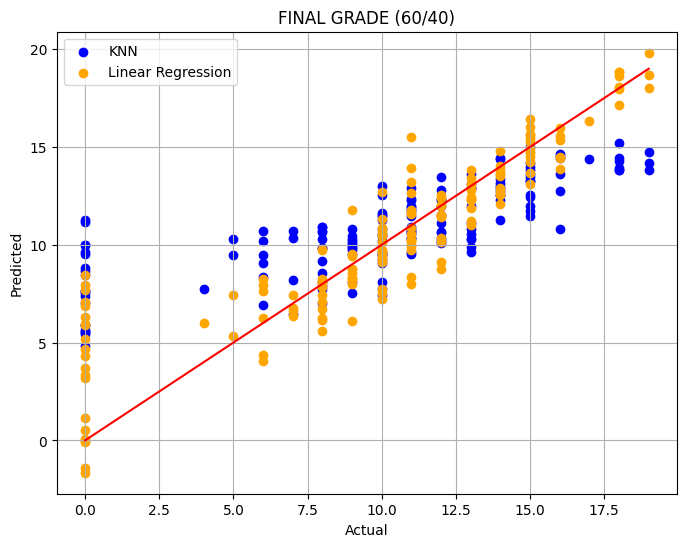

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate(x, y, test_size):
    # Train-Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    # Feature Scaling
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    # KNN Regressor
    knn = KNeighborsRegressor()
    # GridSearchCV to find optimal value for k
    grid_search = GridSearchCV(knn, {'n_neighbors': range(1, 21)}, cv=5)
    grid_search.fit(x_train, y_train)
    best_k = grid_search.best_params_['n_neighbors']
    print("K-Nearest Neighbors:")
    print(f"Optimal K\t\t\t: {best_k}")

    # KNN
    knn_model = KNeighborsRegressor(n_neighbors=best_k).fit(x_train, y_train)
    knn_y_pred = knn_model.predict(x_test)

    # Evaluate KNN
    knn_mse = mean_squared_error(y_test, knn_y_pred)
    knn_rmse = mean_squared_error(y_test, knn_y_pred, squared=False)
    knn_r2 = r2_score(y_test, knn_y_pred)
    print(f"Mean Squared Error (MSE)\t: {knn_mse}")
    print(f"Root Mean Squared Error (RMSE)\t: {knn_rmse}")
    print(f"R-squared (R2)\t\t\t: {knn_r2}\n")

    # Linear Regression
    lr_model = LinearRegression().fit(x_train, y_train)
    lr_y_pred = lr_model.predict(x_test)

    # Evaluate Linear Regression
    lr_mse = mean_squared_error(y_test, lr_y_pred)
    lr_rmse = mean_squared_error(y_test, lr_y_pred, squared=False)
    lr_r2 = r2_score(y_test, lr_y_pred)
    print("Linear Regression Model:")
    print(f"Mean Squared Error (MSE)\t: {lr_mse}")
    print(f"Root Mean Squared Error (RMSE)\t: {lr_rmse}")
    print(f"R-squared (R2)\t\t\t: {lr_r2}\n")

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, knn_y_pred, color='blue', label='KNN')
    plt.scatter(y_test, lr_y_pred, color='orange', label='Linear Regression')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'FINAL GRADE ({int((1-test_size)*100)}/{int(test_size*100)})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Corresponding to 80/20, 70/30, and 60/40 splits
test_sizes = [0.2, 0.3, 0.4]

for size in test_sizes:
    train_and_evaluate(x, y, size)

# ANALYSIS AND COMPARISON, CONCLUSION

The Linear Regression exceeded KNN across various evaluation metrics and train-test splits (60/40, 70/30, 80/20). It achieved lower mean squared errors (MSE) and root mean squared errors (RMSE), along with higher R-squared (R2) scores (ranging from 0.79 to 0.81), indicating greater accuracy.

On the other hand, KNN exhibited higher MSE and RMSE and lower R2 scores ranging from 0.50 to 0.52. These findings indicate lower accuracy and less precise fit compared to Linear Regression in predicting student grades. The optimal value of k influences the predictions, and if not carefully selected, can increase error rates.

Moreover, it can be concluded that Linear Regression is more suitable for our dataset. Based on the scatterplots shown above, the Linear Regression  produced a more linear fit whereas KNN appeared more scattered and deviated. This is because there may be underlying linear relationships from our dataset. KNN, however, was less consistent in capturing the trend of data possibly due to its sensitivity to noise and outliers as it relies on nearby data for prediction.

Aside from this, the Linear Regression is simpler to implement and interpret because it doesn't require any hyperparameter tuning, cross validation, and gridsearching which are essential for KNN in optimizing its performance.

In conclusion, Linear Regression is the appropriate model for predicting student performance within this dataset as seen from lower error rates and high accuracy scores. While KNN was also evaluated, it exhibited lower performance due to sensitivity to noise and outliers as well as its reliance on hyperparameter tuning.